# This notebook is to draw and redraw experiments


### experiment with deltas

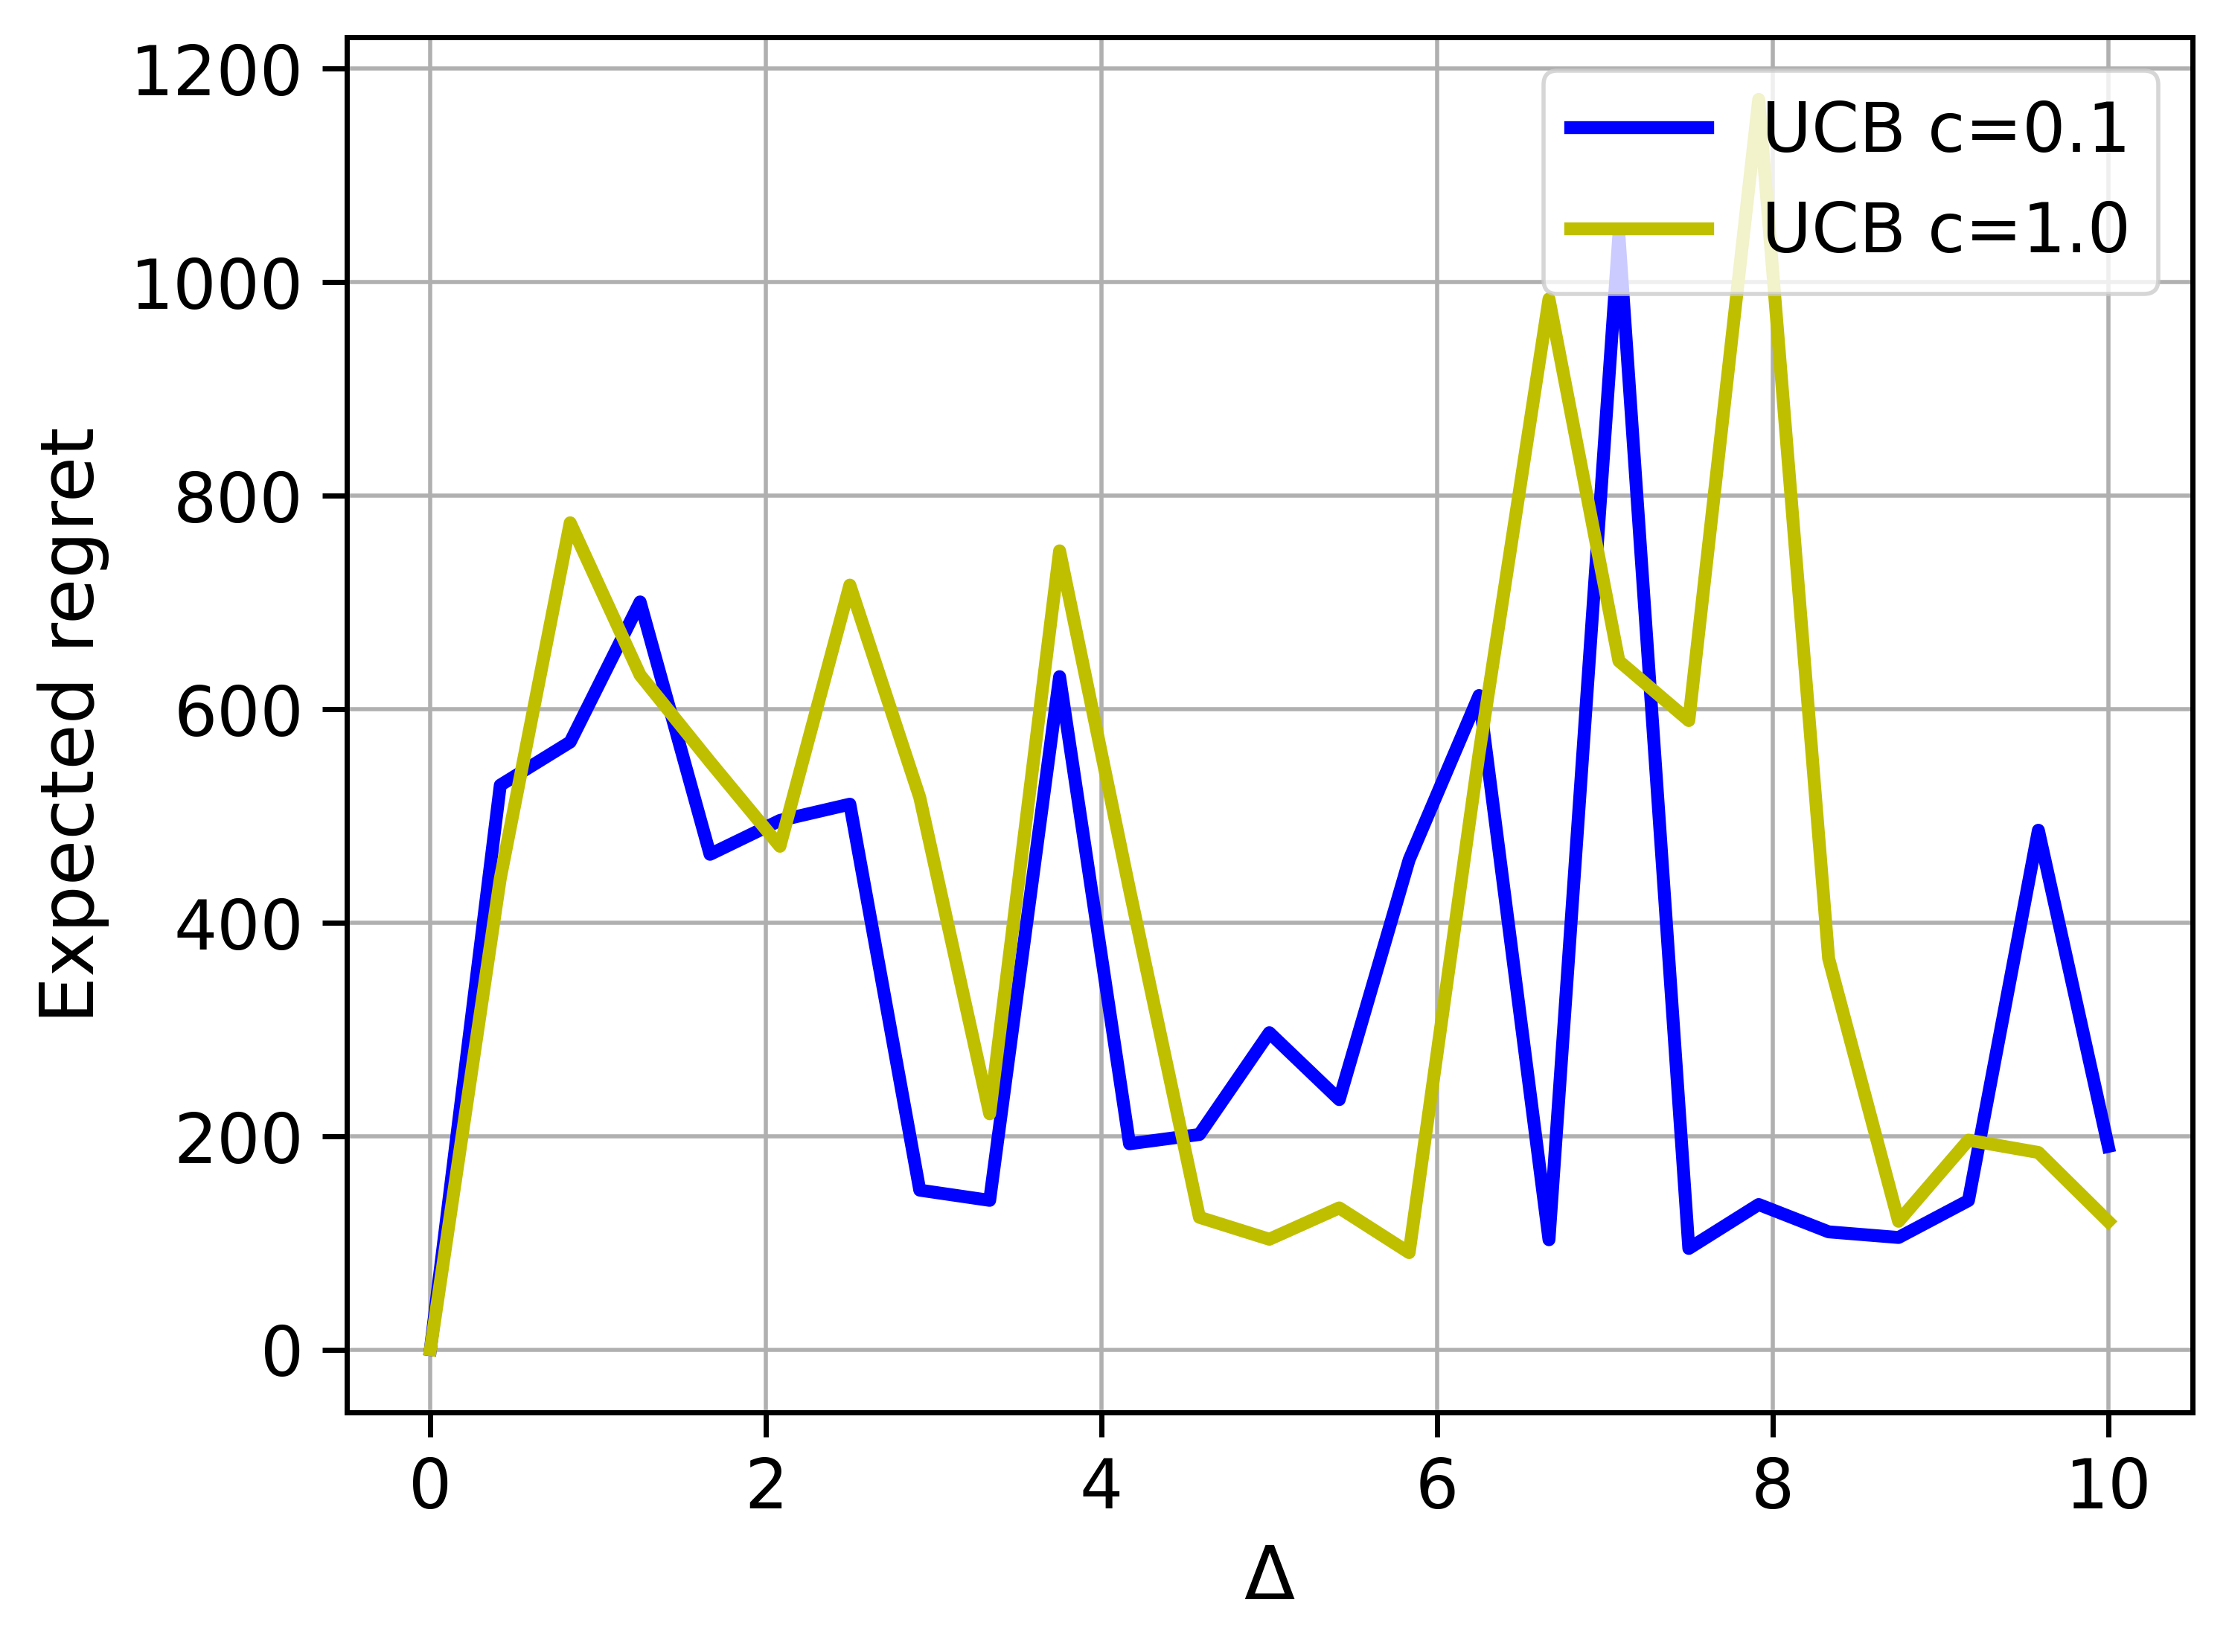

In [2]:
import json

# filename = "delta_light.json"
filename = "delta_heavy.json"
with open(filename, "r") as f:
    data = json.load(f)

from experiment_helpers import delta_tail_draw
from experiment_helpers import drawer
from pathlib import Path

fig = delta_tail_draw.draw(filename)

# drawer.savefig(fig, Path("experiment_helpers/figures"), "delta_heavy")

### runtime comparison

In [15]:
import json

fname = "runtime_comp.json"

with open(fname, "r") as f:
    res = json.load(f)


import pandas as pd
import numpy as np
columns = ["Algorithms", r"Runtime for $RT /T = 0.1$, ms.",
           r"$\#$ fails",
           r"Runtime for $RT /T = 0.05$, ms.",
           r"$\#$ fails ",]

strs = []
for alg, rez in res.items():
    tmp = ["\texttt{"+ alg+"}"]
    for i in range(2):
        if len(rez['thresholds_times'][i]) == 0:
            res_time = None
        else:
            res_time = f"{(float(np.quantile(rez['thresholds_times'][i], 0.9)*1000)//1)/10}"
        tmp.append(res_time)
        tmp.append(f"{rez['num_failures'][i]}")
    # rez['thresholds_times'][i]
    strs.append(tmp)

df = pd.DataFrame(strs, columns=columns)#.iloc[[0,1,2,3, 6]]
df.to_latex("runtimes_table.txt")
df


,Algorithms,"Runtime for $RT /T = 0.1$, ms.",$\#$ fails,"Runtime for $RT /T = 0.05$, ms.",$\#$ fails
0,\texttt{SGD-UCB 0.1},11.2,1,19.0,2
1,\texttt{SGD-UCB-Median 0.1},10.9,0,22.5,0
2,\texttt{SGD-UCB-SMoM 0.1},11.9,0,24.3,0
3,\texttt{RUCB},49.6,3,114.8,3
4,\texttt{APE},237.8,4,None,5
5,\texttt{APE +0.25},None,5,None,5
6,\texttt{APE 2},254.0,1,None,5


### environments with different noises

In [5]:
import json
from experiment_helpers import drawer
from pathlib import Path
import os
import matplotlib.pyplot as plt

exp_path = Path("experiments")
exp_name = "EXP_NAME"
figures_path = Path("figures")

if not figures_path.exists():
    os.mkdir(figures_path)
for rew_type in range(2):
    for env_type in range(1):
        run_name = f"{exp_name}__reward_{rew_type}_env_{env_type}"
                
        with open(exp_path/run_name/"rez.json", 'r') as f:
            rrez = json.load(f)
        print(rrez.keys())
        alg_names = [
            # 'UCB 0.1',
        #     # 'UCB 1.0',
        #     'SGD-UCB 0.1',
        #     # 'SGD-UCB 0.2',
        #     'SGD-UCB-Median 0.1',
        #     # 'SGD-UCB-Median 0.2',
        #     'SGD-UCB-SMoM 0.1',
        #     # 'SGD-UCB-SMoM 0.2',
        #     'RUCB-Median',
        #     'APE +0.25',
        #     'APE 2'
        ]
        alg_legend_names = [
            'UCB',
        #     # 'UCB 1.0',
        #     'SGD-UCB',
        #     # 'SGD-UCB 0.2',
        #     'SGD-UCB-Median',
        #     # 'SGD-UCB-Median 0.2',
        #     'SGD-UCB-SMoM',
        #     # 'SGD-UCB-SMoM 0.2',
        #     'RUCB-Median',
        #     r'APE, $p = 1.25 + \alpha$',
        #     r'APE, $p=2$'
        ]
        # print(rrez.keys())
        # rrez = {nice_name: rrez[name] for name, nice_name in zip(alg_names, alg_legend_names) if name in rrez.keys()}
        
        figs, _ = drawer.plot(rrez, with_legend = (rew_type == 0))
        
        fig_save_path = figures_path/run_name
        if not fig_save_path.exists():
            os.mkdir(fig_save_path)
        for name, fig in figs.items():
            drawer.savefig(fig, fig_save_path, name)
            plt.close(fig)

dict_keys(['UCB 0.1'])
dict_keys(['UCB 0.1'])


<Figure size 1700x800 with 0 Axes>

<Figure size 1700x800 with 0 Axes>

<Figure size 1700x800 with 0 Axes>

<Figure size 1700x800 with 0 Axes>